<a href="https://colab.research.google.com/github/anh56/CoderSchool/blob/master/DT_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập Decision Tree

## Use Decision Tree to classify the Iris dataset
- dataset: 'Iris.csv'


In [0]:
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/AI_LAB/Iris.csv')

In [121]:
df.shape

(150, 6)

In [122]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [123]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [125]:
type(df)

pandas.core.frame.DataFrame

In [126]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#Visualize the dataframe

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


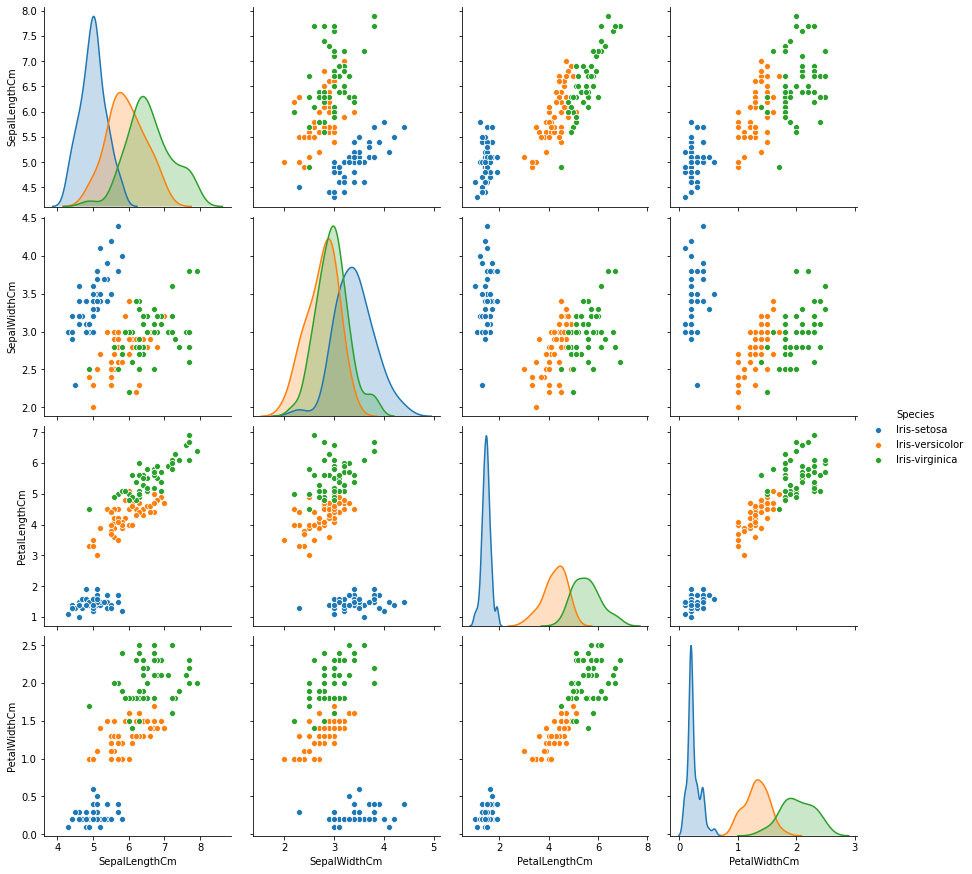

In [128]:
#sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
sns.pairplot(df.drop("Id", axis=1), hue = "Species", size=3)

plt.show()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Split train & test (7/3)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
feature_list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_list]
y = df['Species']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [133]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 17 to 139
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  105 non-null    float64
 1   SepalWidthCm   105 non-null    float64
 2   PetalLengthCm  105 non-null    float64
 3   PetalWidthCm   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [134]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
17,5.1,3.5,1.4,0.3
42,4.4,3.2,1.3,0.2
18,5.7,3.8,1.7,0.3
146,6.3,2.5,5.0,1.9
114,5.8,2.8,5.1,2.4
...,...,...,...,...
70,5.9,3.2,4.8,1.8
132,6.4,2.8,5.6,2.2
33,5.5,4.2,1.4,0.2
109,7.2,3.6,6.1,2.5


In [135]:
y_train

17         Iris-setosa
42         Iris-setosa
18         Iris-setosa
146     Iris-virginica
114     Iris-virginica
            ...       
70     Iris-versicolor
132     Iris-virginica
33         Iris-setosa
109     Iris-virginica
139     Iris-virginica
Name: Species, Length: 105, dtype: object

#DT

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
#check info for this 
dtc = DecisionTreeClassifier();

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_test)

In [138]:
y_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

#Evaluation

In [140]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]])

In [146]:
accuracy_score(y_test, y_predict)

0.9555555555555556

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



#Visualize by graphviz

In [0]:
from sklearn.tree import export_graphviz

In [142]:
dot_data = export_graphviz(dtc, out_file=None)
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.6\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]"] ;
1 [label="gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.65\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 5.0\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]"] ;
3 -> 4 ;
5 [label="X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
5 -> 7 ;
8 [label="X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]"] ;
2 -> 8 ;
9 [label="X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples

In [143]:
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 2.6\\ngini = 0.666\\nsamples = 105\\nvalue = [36, 33, 36]"] ;\n1 [label="gini = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.65\\ngini = 0.499\\nsamples = 69\\nvalue = [0, 33, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 5.0\\ngini = 0.157\\nsamples = 35\\nvalue = [0, 32, 3]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 31\\nvalue = [0, 31, 0]"] ;\n3 -> 4 ;\n5 [label="X[0] <= 6.05\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n5 -> 7 ;\n8 [label="X[2] <= 4.85\\ngini = 0.057\\nsamples = 34\\nvalue = [0, 1, 33]"] ;\n2 -> 8 ;\n9 [label="X[1] <= 3.1\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n8 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 